### Урок 7. Многомерный статистический анализ. Линейная регрессия

#### Задача 1

Дана матрица объект-признак

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [1]:
import numpy as np

In [2]:
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

In [29]:
x = np.array(X)

In [30]:
ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))
x

array([[ 1.        ,  1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [ 1.        , -0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [ 1.        , -0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 1.        ,  0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 1.        ,  0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [ 1.        , -0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 1.        ,  2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 1.        ,  2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 1.        ,  0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [9]:
Y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

In [10]:
y = np.array(Y)
y

array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
        7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [34]:
X12 = x[:, list(range(0, 1)) + list(range(1, 2)) + list(range(2, 3))]
X12

array([[ 1.        ,  1.22401313,  2.30868478],
       [ 1.        , -0.18757272,  1.30337355],
       [ 1.        , -0.81094525,  1.82463398],
       [ 1.        ,  0.75129018,  2.67392052],
       [ 1.        ,  0.00972362,  1.97367255],
       [ 1.        , -0.62972637,  0.77750764],
       [ 1.        ,  2.29536229,  1.81206697],
       [ 1.        ,  0.0920418 ,  2.26971361],
       [ 1.        ,  2.39252799,  3.17563985],
       [ 1.        ,  0.54983815,  2.87988651]])

In [35]:
X13 = x[:, list(range(0, 1)) + list(range(1, 2)) + list(range(3, 4))]
X13

array([[ 1.        ,  1.22401313,  3.03636353],
       [ 1.        , -0.18757272,  5.12093014],
       [ 1.        , -0.81094525,  5.79686488],
       [ 1.        ,  0.75129018,  3.65529809],
       [ 1.        ,  0.00972362,  2.50594319],
       [ 1.        , -0.62972637,  2.84124027],
       [ 1.        ,  2.29536229,  1.95026215],
       [ 1.        ,  0.0920418 ,  7.47708735],
       [ 1.        ,  2.39252799,  3.61420599],
       [ 1.        ,  0.54983815,  1.65752765]])

In [36]:
X14 = x[:, list(range(0, 1)) + list(range(1, 2)) + list(range(4, 5))]
X14

array([[ 1.        ,  1.22401313,  2.69287214],
       [ 1.        , -0.18757272,  3.46363202],
       [ 1.        , -0.81094525,  1.86159445],
       [ 1.        ,  0.75129018,  1.66746094],
       [ 1.        ,  0.00972362,  1.69755173],
       [ 1.        , -0.62972637,  4.54410559],
       [ 1.        ,  2.29536229,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.61081203],
       [ 1.        ,  2.39252799,  5.10773362],
       [ 1.        ,  0.54983815,  1.59635987]])

In [37]:
X23 = x[:, list(range(0, 1)) + list(range(2, 3)) + list(range(3, 4))]
X23

array([[1.        , 2.30868478, 3.03636353],
       [1.        , 1.30337355, 5.12093014],
       [1.        , 1.82463398, 5.79686488],
       [1.        , 2.67392052, 3.65529809],
       [1.        , 1.97367255, 2.50594319],
       [1.        , 0.77750764, 2.84124027],
       [1.        , 1.81206697, 1.95026215],
       [1.        , 2.26971361, 7.47708735],
       [1.        , 3.17563985, 3.61420599],
       [1.        , 2.87988651, 1.65752765]])

In [38]:
X24 = x[:, list(range(0, 1)) + list(range(2, 3)) + list(range(4, 5))]
X24

array([[1.        , 2.30868478, 2.69287214],
       [1.        , 1.30337355, 3.46363202],
       [1.        , 1.82463398, 1.86159445],
       [1.        , 2.67392052, 1.66746094],
       [1.        , 1.97367255, 1.69755173],
       [1.        , 0.77750764, 4.54410559],
       [1.        , 1.81206697, 1.51874636],
       [1.        , 2.26971361, 2.61081203],
       [1.        , 3.17563985, 5.10773362],
       [1.        , 2.87988651, 1.59635987]])

In [39]:
X34 = x[:, list(range(0, 1)) + list(range(3, 4)) + list(range(4, 5))]
X34

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

In [53]:
import statsmodels.api as sm
model = sm.OLS(y, X12)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.7742
Date:                Mon, 13 Sep 2021   Prob (F-statistic):              0.497
Time:                        17:34:55   Log-Likelihood:                -21.975
No. Observations:                  10   AIC:                             49.95
Df Residuals:                       7   BIC:                             50.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7078      2.932      2.288      0.0

c:\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
model = sm.OLS(y, X13)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.29
Date:                Mon, 13 Sep 2021   Prob (F-statistic):            0.00644
Time:                        17:36:22   Log-Likelihood:                -15.767
No. Observations:                  10   AIC:                             37.53
Df Residuals:                       7   BIC:                             38.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6246      1.261      2.875      0.0

c:\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
model = sm.OLS(y, X14)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     2.902
Date:                Mon, 13 Sep 2021   Prob (F-statistic):              0.121
Time:                        17:36:40   Log-Likelihood:                -19.955
No. Observations:                  10   AIC:                             45.91
Df Residuals:                       7   BIC:                             46.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7069      1.626      3.510      0.0

c:\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [56]:
model = sm.OLS(y, X23)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     4.242
Date:                Mon, 13 Sep 2021   Prob (F-statistic):             0.0621
Time:                        17:37:21   Log-Likelihood:                -19.005
No. Observations:                  10   AIC:                             44.01
Df Residuals:                       7   BIC:                             44.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4890      2.474      1.006      0.3

c:\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [58]:
model = sm.OLS(y, X24)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     5.388
Date:                Mon, 13 Sep 2021   Prob (F-statistic):             0.0383
Time:                        17:37:45   Log-Likelihood:                -18.315
No. Observations:                  10   AIC:                             42.63
Df Residuals:                       7   BIC:                             43.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9169      2.377      0.807      0.4

c:\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [59]:
model = sm.OLS(y, X34)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     5.770
Date:                Mon, 13 Sep 2021   Prob (F-statistic):             0.0331
Time:                        17:38:02   Log-Likelihood:                -18.104
No. Observations:                  10   AIC:                             42.21
Df Residuals:                       7   BIC:                             43.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6400      1.705      2.135      0.0

c:\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Модель, построенная на 1 и 3 признаке дала самый большой коэфициент $R^2 = 0,763$, самые малые показатели $AIC = 37.53$ и $AIC = 38.44$.
При уровне значимости $\alpha = 0.05$ значение $P-value = 0.00644$ меньше уровня значимости, что отвергает гипотезу $H0$ о незначимости уравнения регрессии. Так же $P-value$ каждого коэффициента меньше уровня значимости, что так же делает эти коэффициенты значимыми. 

#### Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
(доп) Посчитать среднюю ошибку аппроксимации

In [63]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [66]:
x = np.array(salary)
y = np.array(scoring)

##### Найдем коэффициенты линейной регрессии с помощью формул для парной регрессии:

In [71]:
b1 = np.cov(x, y)[0, 1] / np.var(x)
b0 = y.mean() - b1 * x.mean()

In [73]:
b0, b1

(414.6526192492885, 2.911709869336405)

Уравнение регрессии имеет вид: \
$$y = 414.65 + 2.91 \cdot x$$ \
т.е. с увеличением зарплаты на 1 условную единицу кредитный скоринг увеличивается на 2.91 ед


##### и с помощью метода наименьших квадратов:

In [75]:
x1 = x.reshape(-1, 1)
x1

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [78]:
x1.shape, y.shape

((10, 1), (10,))

In [79]:
ones = np.ones((x1.shape[0], 1))
x1 = np.hstack((ones, x1))

In [80]:
x1.shape

(10, 2)

In [81]:
x1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Запишем матрицу  𝑋⊤𝑋  и посчитаем её определитель.

In [82]:
XTX = x1.T.dot(x1)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [83]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x1.T).dot(y)

print(b)

[444.17735732   2.62053888]


In [84]:
model2 = LinearRegression().fit(x1, y)
print(type(model2))
model2.intercept_, model2.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(444.1773573243595, array([0.        , 2.62053888]))

##### Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1. Посчитайте коэффициент детерминации.

In [88]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

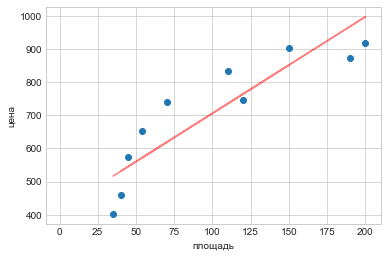

In [91]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

Посчитаем коэффициент детерминации

In [93]:
z1 = b0 + b1 * x

In [94]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [95]:
R1 = 1 - ((y - z1)**2).sum() / sum_of_squares(y)
R1

0.7779147294117221

Коэффициент детерминации, равный $0.7779$, означает, что $78 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $22 \%$ обусловлены какими-то ещё факторами, которые при построении модели не учитывались.

##### Оцените построенное уравнение регрессии с помощью F-критерия Фишера. (доп) Посчитать среднюю ошибку аппроксимации

__F-тест Фишера__. Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации (т.е. для модели, построенной для случайных величин) равен $0$, т.е. что в имеющихся данных вообще нет никакой зависимости. 

При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Распределение Фишера имеет один хвост, поэтому рассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

Если статистика попадает в критическую область, то гипотеза о равенстве нулю коэффициента детерминации отвергается. Это означает, что построенная нами модель значимо соответствует данным.

In [98]:
n = x.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

Возьмём уровень значимости  𝛼=0.05 . Нужный нам квантиль можно посчитать с помощью функции scipy.stats.f.ppf:

In [99]:
from scipy import stats

In [100]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Итак, критическая область:
$$\Omega_\alpha = \left( 5.32, \infty \right)$$

Считаем значение статистики:

In [102]:
F = (R1 / k1) / ((1 - R1) / k2)
F

28.022199846072354

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

In [103]:
import statsmodels.api as sm
model = sm.OLS(y, x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           0.000611
Time:                        14:57:33   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0

c:\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Значение  𝑃−𝑣𝑎𝑙𝑢𝑒 = 0.000611  меньше уровня значимости - уравнение регрессии признаётся значимым, как и коэффициенты. 

Помимо коэффициента детерминации другим способом оценки качества модели является __средняя ошибка аппроксимации__. Она вычисляется по формуле:

$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8-10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [96]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [97]:
mean_approximation_error(y, z1)

0.1171197299778263